<a href="https://colab.research.google.com/github/basava-999/statistics/blob/main/T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

**Overview**

1. **Purpose** – T-tests compare means to check if differences are statistically significant, often when population variance is unknown.
2. **Types** – One-sample (mean vs. known value), two-sample independent (two groups), and paired (same group before/after).
3. **Formula** – Test statistic:

   $$
   t = \frac{\bar{x}_1 - \bar{x}_2}{SE}
   $$

   where $SE$ = standard error of the difference in means.
4. **Distribution** – Uses Student’s t-distribution, which accounts for smaller samples and more variability.
5. **Interpretation** – Compare $t$ with the critical value (or p-value) for chosen $\alpha$; reject $H_0$ if evidence is strong enough.


-------------------------

- Level of Significance : 0.05
- H0 : No difference
- H1 : Significant difference

1. p-value approach:

    - If p-value ≤ α (significance level, e.g., 0.05) → reject H₀ → significant difference.

    - If p-value > α → fail to reject H₀ → no significant difference.

2. Test statistic approach:

    - Compare computed |t| to critical t-value from t-distribution table with appropriate degrees of freedom (df).

    - If |t| > t-critical → reject H₀

----------

**Cohen's $d$ Benchmark Interpretation**

\begin{array}{c|c}
\text{Effect Size } (d) & \text{Interpretation} \\
\hline
0.01 & \text{Very Small} \\
0.20 & \text{Small} \\
0.50 & \text{Medium} \\
0.80 & \text{Large} \\
1.20 & \text{Very Large} \\
2.00 & \text{Huge}
\end{array}


**Interpretation in plain words**

If d = 0.86 then,

“The difference between the two groups is large in practical terms. Group 2 scores are about 0.86 standard deviations higher than Group 1.”


---
**Small sample size**

**1. Hedges’ g** (bias-corrected Cohen’s *d*)

$$
g = \left(1 - \frac{3}{4N - 9}\right) \cdot d
$$

Where:

* $N = n_1 + n_2$ (total sample size)
* $d$ = Cohen’s d

---

**2. Glass’s Δ** (uses control group SD)

$$
\Delta = \frac{\bar{X}_1 - \bar{X}_2}{s_c}
$$

Where:

* $\bar{X}_1$ = mean of experimental group
* $\bar{X}_2$ = mean of control group
* $s_c$ = standard deviation of control group



----------------------

# **1 Sample T Test**

####  **Test Calculation**

$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$


**Data**

In [2]:

sample_data = np.random.normal( 65, 6, 1000)

pop_mean    = 70
sample_mean = np.mean(sample_data)
sample_std  = np.std(sample_data, ddof=1)

n           = len( sample_data)

print( f'Sample Mean    : {sample_mean}')
print( f'Sample Var     : {sample_std}')
print( f'Populaton Mean : {pop_mean}')
print( f'Sample Size    : {n}')


Sample Mean    : 64.73329454107719
Sample Var     : 5.857106991878859
Populaton Mean : 70
Sample Size    : 1000


**Test Statistic**

In [3]:

t = ( sample_mean - pop_mean) / ( sample_std / np.sqrt(n) )
print( f'Test Statistic t : {t}')

Test Statistic t : -28.43517292501413


**Critical Value**

In [4]:

critical_value = stats.t.ppf( 1 - .05/2, n-1)
print( f'Critical Value : {critical_value}')


Critical Value : 1.9623414611334487


- |t| > critical value, Hence reject H0  ( 25.74 > 1.96)
- Significant difference exists

**P Value**

In [5]:

p = 2 * ( 1 - stats.t.cdf( abs(t), n-1))
print( f'P Value : {p}')

P Value : 0.0


- P value < LOS ( 0.05 )
- Hence reject H0

**Using in-built method**


In [6]:

statistic, p_value = stats.ttest_1samp( sample_data, pop_mean)

print( f'Test Statistic t : {statistic}')
print( f'P Value          : {p_value}')

Test Statistic t : -28.43517292501413
P Value          : 8.739048695752303e-131


#### **Effect Size Calculation**



$$
d = \frac{\bar{x} - \mu_0}{s}
$$


In [7]:

effect_size = ( sample_mean - pop_mean) / sample_std
print( f'Effect Size : {effect_size}')

Effect Size : -0.8991991210379693


**Large Effect Size**

# **2 Sample Independent T Test**

### **Student T Test : Equal Variance**


#### **Test Calculation**


$$
t = \frac{\bar{x}_1 - \bar{x}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

$$
s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$


**Data**

In [8]:

sample_1 = np.random.normal( 65, 6, 1000)
sample_2 = np.random.normal( 68, 6, 1000)

sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)

sample_1_var  = np.var(sample_1, ddof = 1)
sample_2_var  = np.var(sample_2, ddof = 1)

n1 = len(sample_1)
n2 = len(sample_2)

dof = n1 + n2 - 2

print( f'Sample 1 Mean : {sample_1_mean}')
print( f'Sample 2 Mean : {sample_2_mean}\n')

print( f'Sample 1 Var  : {sample_1_var}')
print( f'Sample 2 Var  : {sample_2_var}\n')

print( f'Sample 1 Size : {n1}')
print( f'Sample 2 Size : {n2}\n')

print( f'Degree of Freedom : { dof}')


Sample 1 Mean : 64.8190124456206
Sample 2 Mean : 68.07104000361392

Sample 1 Var  : 36.16765252044436
Sample 2 Var  : 35.99034993274226

Sample 1 Size : 1000
Sample 2 Size : 1000

Degree of Freedom : 1998


**Test Statistic**

In [9]:

s_pooled = np.sqrt( ( ( n1 - 1) * sample_1_var + ( n2 - 1) * sample_2_var) / dof)

t = ( sample_1_mean - sample_2_mean) / ( s_pooled * np.sqrt( 1/n1 + 1/n2))
print( f'Test Statistic t : {t}')

Test Statistic t : -12.106314896266055


**critical Value**

In [10]:

critical_value = stats.t.ppf( 1 - .05/2, dof)
print( f'Critical Value : {critical_value}')


Critical Value : 1.9611520148367056


- |t| > critical value, reject H0
- Significant difference

**P - Value**

In [11]:

p = 2*( 1 - stats.t.cdf( abs( t), dof ))
print( f'P Value : {p}')

P Value : 0.0


- P value < LOS
- Reject H0

**In-built using scipy**

In [12]:

statistic, p_value = stats.ttest_ind( sample_1, sample_2, equal_var = True)

print( f'Test Statistic t : {statistic}')
print( f'P Value          : {p_value}')

Test Statistic t : -12.106314896266055
P Value          : 1.3145603823342704e-32


#### **Effect Size**

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}
$$

$$
s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
$$

In [13]:

effect_size = ( sample_1_mean - sample_2_mean) / s_pooled
print( f'Effect Size : {effect_size}')

Effect Size : -0.5414108613013843


**Moderate to Strong**

### **Welch T Test : Un-equal Variance**

#### **Test Calculation**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

$$
df = \frac{\left( \frac{s_1^2}{n_1} + \frac{s_2^2}{n_2} \right)^2}
{\frac{\left( \frac{s_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{s_2^2}{n_2} \right)^2}{n_2 - 1}}
$$


**Data**

In [14]:

sample_1 = np.random.normal( 65, 6, 1000)
sample_2 = np.random.normal( 68, 4, 1000)

sample_1_mean = np.mean(sample_1)
sample_2_mean = np.mean(sample_2)

sample_1_var  = np.var(sample_1, ddof = 1)
sample_2_var  = np.var(sample_2, ddof = 1)

n1 = len(sample_1)
n2 = len(sample_2)

dof_nume = np.square( sample_1_var/n1 + sample_2_var/n2)
dof_deno = ( sample_1_var/n1 )**2 / ( n1 - 1) + (sample_2_var/n2)**2 / ( n2 - 1)

dof = dof_nume / dof_deno

print( f'Sample 1 Mean : {sample_1_mean}')
print( f'Sample 2 Mean : {sample_2_mean}\n')

print( f'Sample 1 Var  : {sample_1_var}')
print( f'Sample 2 Var  : {sample_2_var}\n')

print( f'Sample 1 Size : {n1}')
print( f'Sample 2 Size : {n2}\n')

print( f'Degree of Freedom : { dof}')



Sample 1 Mean : 65.11849349657116
Sample 2 Mean : 68.01703555473777

Sample 1 Var  : 33.97795952285103
Sample 2 Var  : 17.40527462041339

Sample 1 Size : 1000
Sample 2 Size : 1000

Degree of Freedom : 1809.7396051765263


**Test Statistic**

In [15]:

t = ( sample_1_mean - sample_2_mean) / np.sqrt( sample_1_var / n1 + sample_2_var/n2)
print( f'Test Statistic t : {t}')

Test Statistic t : -12.78700657305215


**critical Value**

In [16]:

critical_value = stats.t.ppf( 1 - .05/2, dof)
print( f'Critical Value : {critical_value}')

Critical Value : 1.9612756824329578


- |t| > critical value, Reject H0
- significant difference


**P Value**

In [17]:

p = 2 * ( 1 - stats.t.cdf( abs(t), dof))
print( f'P Value : {p}')

P Value : 0.0


- p < LOS, reject H0

**In Built Method**

In [18]:

statistic, p_value = stats.ttest_ind( sample_1, sample_2, equal_var = False)

print( f'Test Statistic t : {statistic}')
print( f'P Value          : {p_value}')


Test Statistic t : -12.78700657305215
P Value          : 6.599201745804631e-36


#### **Effect Size**

$$
d = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2 + s_2^2}{2}}}
$$

In [19]:

effect_size = ( sample_1_mean - sample_2_mean) / np.sqrt( (sample_1_var + sample_2_var ) / 2 )
print( f'Effect Size : {effect_size}')

Effect Size : -0.5718523185216247


**Moderate to Strong**

# **Paired T Test**

####**Test Calculation**

$$
t = \frac{\bar{d}}{ \frac{s_d}{\sqrt{n}} }
$$

where

$$
s_d = \sqrt{\frac{\sum_{i=1}^{n} (d_i - \bar{d})^2}{n-1}}
$$

**Data**

In [20]:

before = np.random.normal( 65, 10, 1000)
after  = before + np.random.normal( 3, 5, 1000)

difference = after - before

diff_mean = np.mean( difference)
diff_std  = np.std( difference, ddof = 1)
n         = len( difference)

print( f'Mean Difference : {diff_mean}')
print( f'Std Difference  : {diff_std}')
print( f'Sample Size     : {n}')



Mean Difference : 2.629367218579415
Std Difference  : 5.057000477426535
Sample Size     : 1000


**Test Statistic**

In [21]:

t = diff_mean / ( diff_std / np.sqrt(n))
print( f'Test Statistic t : {t}')

Test Statistic t : 16.442136505243276


**critical value**

In [22]:

critical_value = stats.t.ppf( 1 - .05/2, n-1)
print( f'Critical Value : {critical_value}')

Critical Value : 1.9623414611334487


- |t| > critical value, reject H0
- Difference if far away from 0


**P value**

In [23]:

p = 2 * ( 1 - stats.t.cdf( t, n-1))
print( f'P Value : {p}')


P Value : 0.0


- P value < LOS
- Reject H0

**Built In**

In [24]:

statistic, p = stats.ttest_rel( before, after)

print( f'Test Statistic t : {statistic}')
print( f'P Value          : {p}')

Test Statistic t : -16.44213650524328
P Value          : 6.045054387679889e-54


#### **Effect Size**

$$
d = \frac{\bar{d}}{s_d}
$$

In [25]:

effect_size = diff_mean / diff_std
print( f'Effect Size : {effect_size}')

Effect Size : 0.519946009559698


**Moderate to Strong**

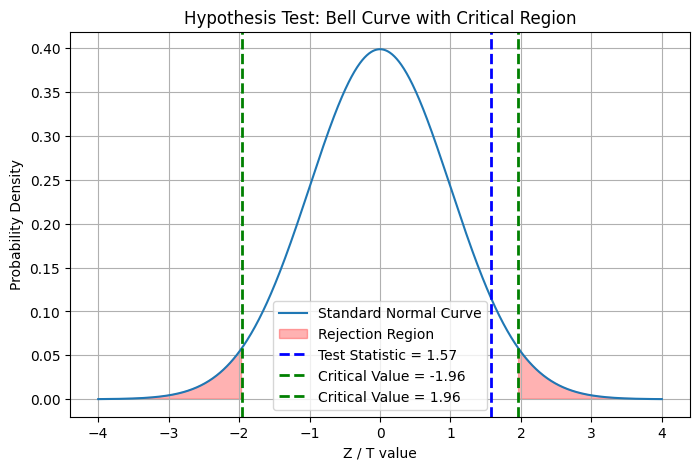

In [26]:

import matplotlib.pyplot as plt
from scipy.stats import norm, t


alpha = 0.05              # significance level
test_statistic = 1.57     # your calculated t or z statistic - sample example value taken
tails = 2                 # 1 for one-tailed, 2 for two-tailed

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # standard normal


if tails == 2:
    critical_value = norm.ppf(1 - alpha/2)
    crit_vals = [-critical_value, critical_value]
else:
    critical_value = norm.ppf(1 - alpha)
    crit_vals = [critical_value]  # right tail
    # For left tail test, use norm.ppf(alpha)

plt.figure(figsize=(8,5))
plt.plot(x, y, label='Standard Normal Curve')


if tails == 2:
    plt.fill_between(x, y, 0, where=(x <= crit_vals[0]) | (x >= crit_vals[1]), color='red', alpha=0.3, label='Rejection Region')
else:
    plt.fill_between(x, y, 0, where=(x >= crit_vals[0]), color='red', alpha=0.3, label='Rejection Region')

plt.axvline(test_statistic, color='blue', linestyle='--', linewidth=2, label=f'Test Statistic = {test_statistic:.2f}')

for cv in crit_vals:
    plt.axvline(cv, color='green', linestyle='--', linewidth=2, label=f'Critical Value = {cv:.2f}')

plt.title('Hypothesis Test: Bell Curve with Critical Region')
plt.xlabel('Z / T value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
